In [1]:
from common import load_track, GENRES
import sys
import numpy as np
from math import pi
from pickle import dump
import os
from optparse import OptionParser

import sys; sys.argv=['']; del sys


import matplotlib.style as ms
ms.use('seaborn-muted')
% matplotlib inline

# and IPython.display for audio output
import IPython.display
import librosa.display

Using TensorFlow backend.


In [2]:
TRACK_COUNT = 1000

def get_default_shape(dataset_path):
    tmp_features, _ = load_track(os.path.join(dataset_path,
        'blues/blues.00000.au'))
    return tmp_features.shape



In [3]:

def collect_data(dataset_path):
    '''
    Collects data from the GTZAN dataset into a pickle. Computes a Mel-scaled
    power spectrogram for each track.

    :param dataset_path: path to the GTZAN dataset directory
    :returns: triple (x, y, track_paths) where x is a matrix containing
        extracted features, y is a one-hot matrix of genre labels and
        track_paths is a dict of absolute track paths indexed by row indices in
        the x and y matrices
    '''
    default_shape = get_default_shape(dataset_path)
    x = np.zeros((TRACK_COUNT,) + default_shape, dtype=np.float32)
    y = np.zeros((TRACK_COUNT, len(GENRES)), dtype=np.float32)
    track_paths = {}

    for (genre_index, genre_name) in enumerate(GENRES):
        for i in range(TRACK_COUNT // len(GENRES)):
            file_name = '{}/{}.000{}.au'.format(genre_name,
                    genre_name, str(i).zfill(2))
            print('Processing', file_name)
            path = os.path.join(dataset_path, file_name)
            track_index = genre_index  * (TRACK_COUNT // len(GENRES)) + i
            x[track_index], _ = load_track(path, default_shape)
            y[track_index, genre_index] = 1
            track_paths[track_index] = os.path.abspath(path)

    return (x, y, track_paths)



Processing blues/blues.00000.au
Processing blues/blues.00001.au
hi /home/infinity/MGR/genre-recognition-master/data/genres/blues/blues.00001.au


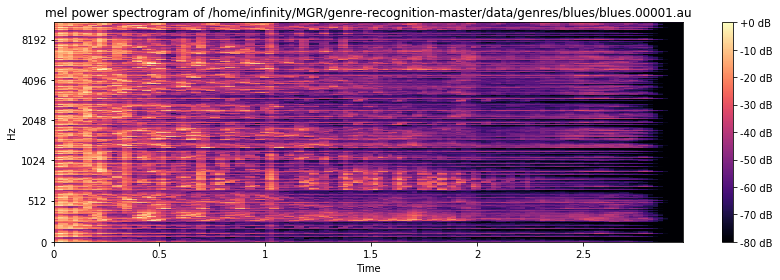

Processing blues/blues.00002.au
Processing blues/blues.00003.au
Processing blues/blues.00004.au
Processing blues/blues.00005.au
Processing blues/blues.00006.au
Processing blues/blues.00007.au
Processing blues/blues.00008.au
Processing blues/blues.00009.au
Processing blues/blues.00010.au
Processing blues/blues.00011.au
Processing blues/blues.00012.au
Processing blues/blues.00013.au
Processing blues/blues.00014.au
Processing blues/blues.00015.au
Processing blues/blues.00016.au
Processing blues/blues.00017.au
Processing blues/blues.00018.au
Processing blues/blues.00019.au
Processing blues/blues.00020.au
Processing blues/blues.00021.au
hi /home/infinity/MGR/genre-recognition-master/data/genres/blues/blues.00021.au


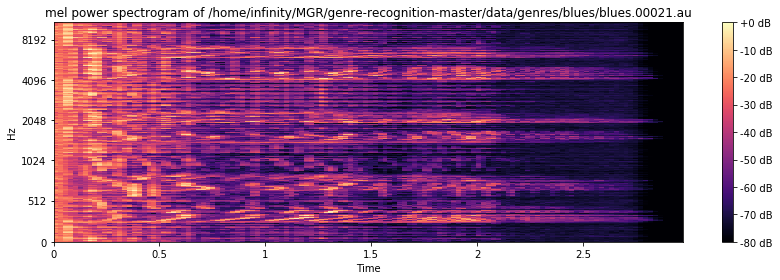

Processing blues/blues.00022.au
Processing blues/blues.00023.au
Processing blues/blues.00024.au
Processing blues/blues.00025.au
Processing blues/blues.00026.au
Processing blues/blues.00027.au
Processing blues/blues.00028.au
Processing blues/blues.00029.au
Processing blues/blues.00030.au
Processing blues/blues.00031.au
Processing blues/blues.00032.au
Processing blues/blues.00033.au
Processing blues/blues.00034.au
Processing blues/blues.00035.au
Processing blues/blues.00036.au
Processing blues/blues.00037.au
Processing blues/blues.00038.au
Processing blues/blues.00039.au
Processing blues/blues.00040.au
Processing blues/blues.00041.au
hi /home/infinity/MGR/genre-recognition-master/data/genres/blues/blues.00041.au


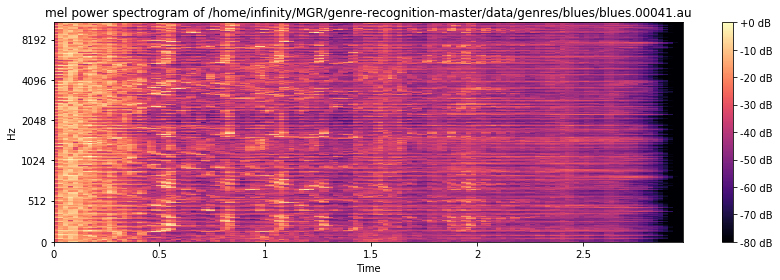

Processing blues/blues.00042.au
Processing blues/blues.00043.au
Processing blues/blues.00044.au
Processing blues/blues.00045.au
Processing blues/blues.00046.au
Processing blues/blues.00047.au
Processing blues/blues.00048.au
Processing blues/blues.00049.au
Processing blues/blues.00050.au
Processing blues/blues.00051.au
Processing blues/blues.00052.au
Processing blues/blues.00053.au
Processing blues/blues.00054.au
Processing blues/blues.00055.au
Processing blues/blues.00056.au
Processing blues/blues.00057.au
Processing blues/blues.00058.au
Processing blues/blues.00059.au
Processing blues/blues.00060.au
Processing blues/blues.00061.au
hi /home/infinity/MGR/genre-recognition-master/data/genres/blues/blues.00061.au


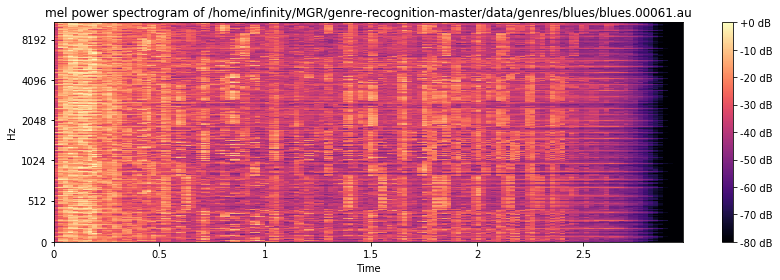

Processing blues/blues.00062.au


KeyboardInterrupt: 

In [4]:
if __name__ == '__main__':
    parser = OptionParser()

    parser.add_option('-d', '--dataset_path', dest='dataset_path',
            #default=os.path.join(os.path.dirname(__file__), 'data/genres'),
            default=os.path.join(os.getcwd(), 'data/genres'),
            help='path to the GTZAN dataset directory', metavar='DATASET_PATH')
    '''
    os.path.dirname(sys.argv[0]) or os.path.dirname(__file__). 

    Both these locations find the path of the currently running Python script file.

    Usually, __file__ is the best choice.
    '''
   
    parser.add_option('-o', '--output_pkl_path', dest='output_pkl_path',
            #default=os.path.join(os.path.dirname(__file__), 'data/data.pkl'),
            default=os.path.join(os.getcwd(), 'data/data.pkl'),
            help='path to the output pickle', metavar='OUTPUT_PKL_PATH')
    

    options, args = parser.parse_args()
   
    (x, y, track_paths) = collect_data(options.dataset_path)
    
 
    data = {'x': x, 'y': y, 'track_paths': track_paths}
    with open(options.output_pkl_path, 'wb') as f:
        dump(data, f)
